第8回の演習です。特徴点マッチングを行います。
左上の「ファイル」＞「ドライブにコピーを保存」を選択して、Google DriveにNotebookを保存します。ご自身のGoogleドライブの"Colab Notebooks"フォルダで、保存したNotebookを右クリックし、「アプリで開く」＞「Google Colaboratory」を選択します。その上で、各コードを実行するには、以下のコマンドを実行してください。実行は「再生」ボタンを押します。

In [ ]:
print("Chapter 8")

Chapter 8


# 特徴点マッチング

In [2]:
# ローカル環境では直接画像ファイルを指定
import os
image_filename = "example.png"
print("ファイル名：", image_filename)
print(f"ファイルが存在するか確認: {os.path.exists(image_filename)}")

ファイル名： example.png
ファイルが存在するか確認: True


図を描くには、以下のようにmatplotlibを使うこともできます。

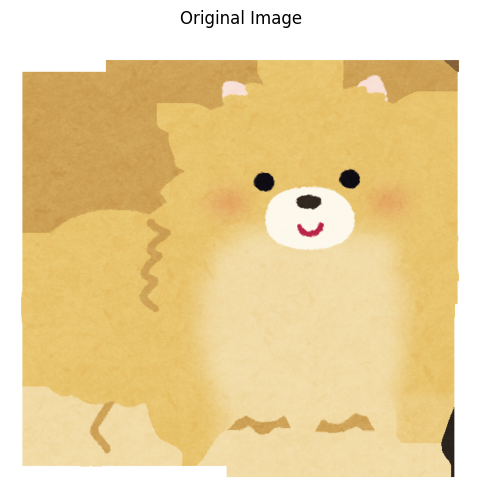

In [3]:
# OpenCVを使う準備
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title="Image", cmap=None):
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 3:
        # カラー画像の場合、BGR→RGB変換
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        # グレースケール画像の場合
        plt.imshow(img, cmap='gray' if cmap is None else cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

img = cv2.imread(image_filename)
show_image(img, "Original Image")

## AKAZEによる特徴点マッチング

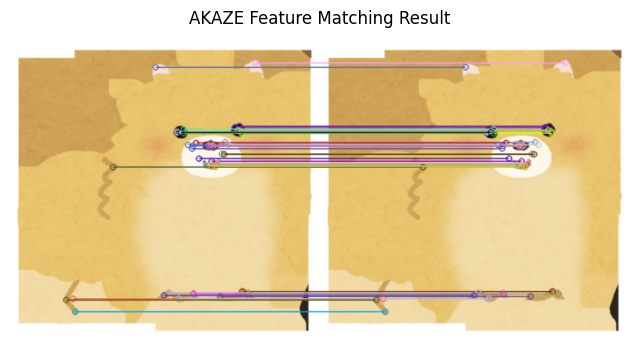

In [4]:
# AKAZE

# im_left = cv2.imread('Lenna.jpg')
# im_right = cv2.imread('LennaRotated.jpg')
im_left = cv2.imread(image_filename)
im_right = cv2.imread(image_filename)

# ダウンサンプリング
im_left_lowers = cv2.pyrDown(im_left)
im_right_lowers = cv2.pyrDown(im_right)

# AKAZE抽出器
detector = cv2.AKAZE_create()

# 画像からKeypointとDescriptorを生成
kp_left, des_left = detector.detectAndCompute(im_left_lowers, None)
kp_right, des_right = detector.detectAndCompute(im_right_lowers, None)

# 全探索マッチング、上位２つの結果を採用
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_left, des_right, k=2)

# データを間引き
ratio = 0.5
good = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])

# マッチング結果の描画
im_result = cv2.drawMatchesKnn(im_left_lowers, kp_left, im_right_lowers, kp_right, good, None, flags=2)

# show_image関数を使用して表示
show_image(im_result, "AKAZE Feature Matching Result")

## ORBによる特徴点マッチング

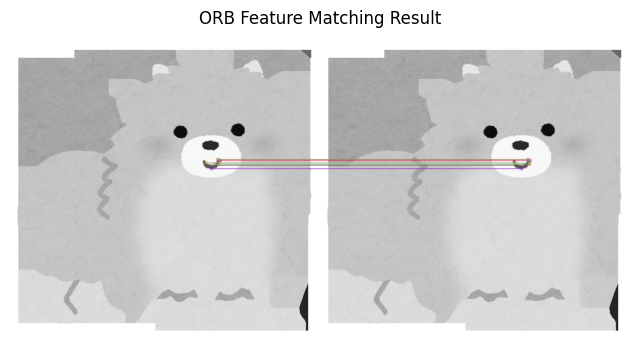

In [5]:
# ORB

img1 = cv2.imread(image_filename,cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_filename,cv2.IMREAD_GRAYSCALE)

# ORB detector初期化
orb = cv2.ORB_create()

# 特徴検出
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# ハミング距離による総当たりマッチングインスタンスを作成
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# マッチング実行
matches = bf.match(des1,des2)

# ハミング距離でソート
matches = sorted(matches, key = lambda x:x.distance)

# ハミング距離が小さい10点を描画
NOT_DRAW_SINGLE_POINTS = 2
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=NOT_DRAW_SINGLE_POINTS)

# cv2.imwrite('bf_im3.jpg', img3)

# show_image関数を使用して表示
show_image(img3, "ORB Feature Matching Result")

# イメージモザイキング
パノラマ画像を作ります。左側のカメラ画像（[pano_left.jpg](https://drive.google.com/file/d/1HioEPRPur3Gi5ZqJ6Pkan_v-ScTSZ8Iv/view?usp=sharing)）と右側のカメラ画像（[pano_right.jpg](https://drive.google.com/file/d/1eMAZFuwlvcznHBxyVzgxgpOfBNx62EYR/view?usp=sharing)）をダウンロードして下さい。その上で以下を実行し、これらのファイルをアップロードします。もちろん、これらのカメラ画像としてご自身で撮影した写真を使っても構いません。

In [6]:
# ローカル環境では直接画像ファイルを指定
image_filename1 = "example.png"
image_filename2 = "example.png"
print("ファイル名：", image_filename1, image_filename2)

ファイル名： example.png example.png


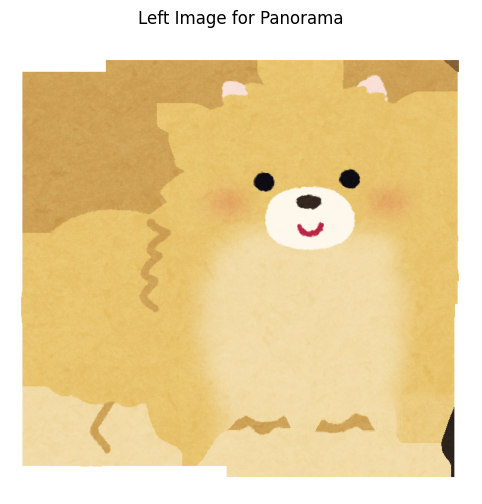

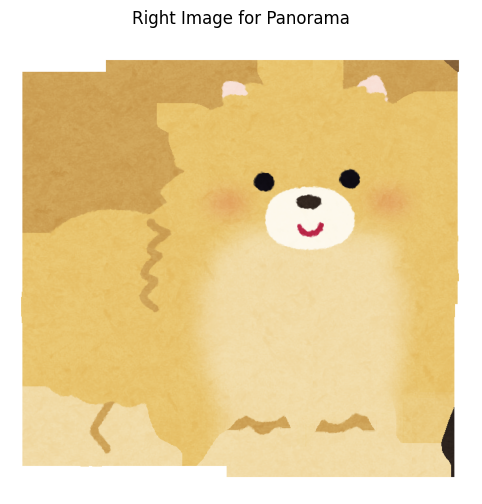

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img1 = cv2.imread(image_filename1)
img2 = cv2.imread(image_filename2)

# show_image関数を使用して個別に表示
show_image(img1, "Left Image for Panorama")
show_image(img2, "Right Image for Panorama")

イメージモザイキングの処理を行って、2枚のカメラ画像をつなぎます。結果、1枚のパノラマ画像ができます。OpenCVにはstitcher関数が用意されており、イメージモザイキングを行うことができます。複数の画像の間の幾何学的変換と色補正を自動的に処理し、パノラマ画像を構成します。

In [8]:
# Stitcher
images = []
images.append(img1)
images.append(img2)

stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
(status, stitched) = stitcher.stitch(images)

if status != cv2.Stitcher_OK:
    print("Can't stitch images, error code = %d" % status)

# show_image関数を使用して表示
show_image(stitched, "Panorama Stitched Image")

Can't stitch images, error code = 1


AttributeError: 'NoneType' object has no attribute 'shape'

<Figure size 800x600 with 0 Axes>